In [1]:
import pandas as pd
import numpy as np

# A. Data Preparation and Cleaning

Import data

In [2]:
df1 = pd.read_csv('mexico-real-estate-1.csv')
df2 = pd.read_csv('mexico-real-estate-2.csv')
df3 = pd.read_csv('mexico-real-estate-3.csv')

Clean df1
Inspect data: shape, info, head

In [3]:
df1

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186.0,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82.0,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150.0,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,"$94,835.67"
...,...,...,...,...,...,...
695,house,Morelos,NaN,NaN,310.0,"$237,089.17"
696,house,Yucatán,21.050653,-89.558841,334.0,"$137,017.34"
697,house,Yucatán,21.343796,-89.262060,130.0,"$110,404.35"
698,apartment,Nuevo León,NaN,NaN,155.0,"$184,446.42"


In [4]:
df1.shape

(700, 6)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_usd      700 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.9+ KB


Handle missing data and format column type

In [6]:
df1.dropna(inplace=True)

In [7]:
df1['property_type']

0          house
1          house
2      apartment
3      apartment
5          house
         ...    
693        house
694    apartment
696        house
697        house
699        house
Name: property_type, Length: 583, dtype: object

In [8]:
df1['price_usd']

0       $67,965.56
1       $63,223.78
2       $84,298.37
3       $94,308.80
5      $105,191.37
          ...     
693    $115,910.26
694     $77,572.89
696    $137,017.34
697    $110,404.35
699     $56,637.97
Name: price_usd, Length: 583, dtype: object

Change 'price_usd' from object to float

In [9]:
df1['price_usd'] = df1['price_usd'].str.replace('$','',regex=False)
df1['price_usd'] = df1['price_usd'].str.replace(',','',regex=False)
df1['price_usd'] = df1['price_usd'].astype(float)
df1['price_usd']

# another way to write the code: df1['price_usd'] = df1['price_usd'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)

0       67965.56
1       63223.78
2       84298.37
3       94308.80
5      105191.37
         ...    
693    115910.26
694     77572.89
696    137017.34
697    110404.35
699     56637.97
Name: price_usd, Length: 583, dtype: float64

In [10]:
df1.head(10)

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37
6,house,Querétaro,20.716315,-100.452503,320.0,274034.68
9,house,Morelos,18.812605,-98.954826,281.0,151509.56
10,house,Chiapas,16.769737,-93.088928,140.0,79029.72
11,house,Estado de México,19.305407,-99.646948,235.0,115937.75
12,house,Morelos,18.804197,-98.932816,117.0,63223.78


Clean df2

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_mxn      700 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


In [12]:
df2.dropna(inplace=True)

Convert mxn to usd

In [13]:
df2['price_usd'] = df2['price_mxn']/19
df2.drop(columns=['price_mxn'], inplace=True)

In [14]:
df2

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,68421.052632
2,house,Morelos,23.634501,-102.552788,360.0,278947.368421
6,apartment,Estado de México,19.272040,-99.572013,85.0,65789.473684
7,house,San Luis Potosí,22.138882,-100.996510,158.0,111578.947368
8,apartment,Distrito Federal,19.394558,-99.129707,65.0,39904.736842
...,...,...,...,...,...,...
695,house,Morelos,18.917542,-98.963181,140.0,76315.789474
696,house,Distrito Federal,19.472128,-99.146697,190.0,102263.157895
697,house,Estado de México,19.234984,-99.558175,115.0,110526.315789
698,house,Puebla,18.918714,-98.426639,90.0,46842.105263


Clean df3

In [15]:
df3

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67
...,...,...,...,...,...
695,house,|México|Jalisco|Tlajomulco de Zúñiga|Tlajomulc...,"20.532264,-103.484418",175.0,121178.91
696,house,|México|Morelos|Jiutepec|,"18.9289862,-99.1802147",100.0,47417.83
697,house,|México|Yucatán|Mérida|,"21.0284038368,-89.6530058049",81.0,39524.23
698,house,|México|San Luis Potosí|San Luis Potosí|,"22.11830417,-101.0321938992",360.0,245050.24


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    float64
 4   price_usd                700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


In [17]:
df3.dropna(inplace=True)

split lat-lon

In [18]:
df3[['lat', 'lon']] = df3['lat-lon'].str.split(',',expand=True)

In [19]:
df3

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175.0,102763.00,20.689157,-103.366728
...,...,...,...,...,...,...,...
695,house,|México|Jalisco|Tlajomulco de Zúñiga|Tlajomulc...,"20.532264,-103.484418",175.0,121178.91,20.532264,-103.484418
696,house,|México|Morelos|Jiutepec|,"18.9289862,-99.1802147",100.0,47417.83,18.9289862,-99.1802147
697,house,|México|Yucatán|Mérida|,"21.0284038368,-89.6530058049",81.0,39524.23,21.0284038368,-89.6530058049
698,house,|México|San Luis Potosí|San Luis Potosí|,"22.11830417,-101.0321938992",360.0,245050.24,22.11830417,-101.0321938992


In [20]:
df3['state'] = df3['place_with_parent_names'].str.split('|',expand=True)[2]

In [21]:
df3.drop(columns = ['lat-lon','place_with_parent_names'], inplace=True)

In [22]:
df3

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71.0,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233.0,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300.0,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84.0,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175.0,102763.00,20.689157,-103.366728,Jalisco
...,...,...,...,...,...,...
695,house,175.0,121178.91,20.532264,-103.484418,Jalisco
696,house,100.0,47417.83,18.9289862,-99.1802147,Morelos
697,house,81.0,39524.23,21.0284038368,-89.6530058049,Yucatán
698,house,360.0,245050.24,22.11830417,-101.0321938992,San Luis Potosí


Re-order columns

In [23]:
cols = list(df3.columns.values)
print(cols)

['property_type', 'area_m2', 'price_usd', 'lat', 'lon', 'state']


In [24]:
df3 = df3[['property_type','state','lat','lon','area_m2','price_usd']]

In [25]:
df3

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Distrito Federal,19.52589,-99.151703,71.0,48550.59
1,house,Estado de México,19.2640539,-99.5727534,233.0,168636.73
2,house,Estado de México,19.268629,-99.671722,300.0,86932.69
4,apartment,Veracruz de Ignacio de la Llave,19.511938,-96.871956,84.0,68508.67
5,house,Jalisco,20.689157,-103.366728,175.0,102763.00
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.9289862,-99.1802147,100.0,47417.83
697,house,Yucatán,21.0284038368,-89.6530058049,81.0,39524.23
698,house,San Luis Potosí,22.11830417,-101.0321938992,360.0,245050.24


In [26]:
df3['lat'] = df3['lat'].astype(float)
df3['lon'] = df3['lon'].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   state          582 non-null    object 
 2   lat            582 non-null    float64
 3   lon            582 non-null    float64
 4   area_m2        582 non-null    float64
 5   price_usd      582 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.8+ KB


Concatenate DataFrame

In [27]:
df = pd.concat([df1, df2, df3])

In [28]:
df

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.928986,-99.180215,100.0,47417.83
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24


# B. Exploratory Data Analysis (EDA)

The next step is EDA, which is exploring the characteristics of the dataset using descriptive statistics and data visualisation. A good way to get started is by looking at each column and ask yourself questions what it says about the the dataset.

1. Location data: 'lat' and 'lon' They say the most important thing in real estate is location, we can actually see where in Mexico the houese are located by using this data. Since it's latitude and longtitude, we can use scatter plot on top of a map. A great tool fot this is the scatter_mapbox from the plotly library.

In [29]:
df

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.928986,-99.180215,100.0,47417.83
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24


In [30]:
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
# creating a box plot to view where the houses are located

fig = px.scatter_mapbox(
    data_frame=df,
    lat=df['lat'],
    lon=df['lon'],
    center={'lat':19.43,'lon':-99.13}, # map will be centered on Meico city
    width=1200, # map width
    height=600, # map height
    hover_data=['price_usd'] # display proce when hovering mouse
)

fig.update_layout(mapbox_style = 'open-street-map')

fig.show()

![house location](house_locations.png)

By looking at the graph, we can see that the properties are spread out within Mexico with large concentration in the center around Mexico city.

2. Categorical data: 'State' - Even though we can get a clear picture of how many properties we have by states by looking at the map, we can get the exact number by using the 'State' column

In [32]:
# top 10 states with properties

df['state'].value_counts(ascending=False).head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

3. Numercial data: now that we know where our houses are located. The next step is to use descriptive statistics to know how much these house cost on average, how big the house in term of size.

In [33]:
df[['area_m2','price_usd']].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980800
std,80.594539,65426.173793
min,60.000000,33157.894737
25%,101.750000,65789.473684
50%,156.000000,99262.132105
75%,220.000000,150846.665000
max,385.000000,326733.660000


Whilie using numbers is good to view data, using visulisations make it evenn easier to understand and absord data

Text(0.5, 1.0, 'Distribution of House Sizes')

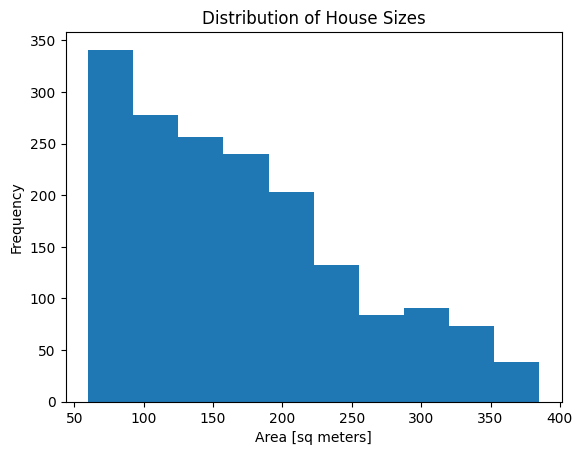

In [34]:
# Plot distribution of house sizes

plt.hist(df['area_m2'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Frequency')
plt.title('Distribution of House Sizes')

With the histogram, we have a skewed distribution due to the fact that there are large proportion of how house between the size range of 50-150 square meters, which make sense because the smaller the size of houses the cheaper the price, which results in the average being pulled towards the left side and causes a skewed distribution.

Text(0.5, 1.0, 'Distribution of House Prices')

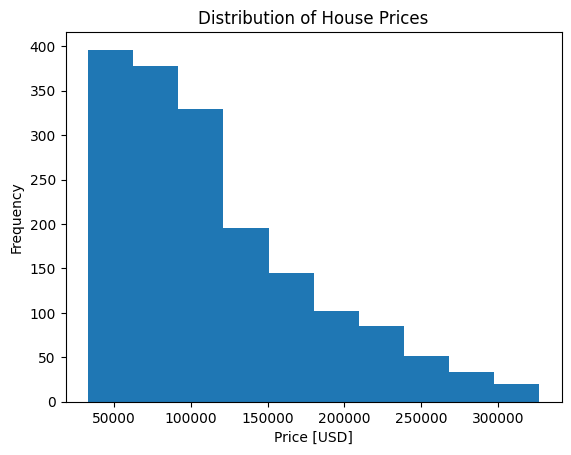

In [35]:
# Plot distribution of house prices

plt.hist(df['price_usd'])
plt.xlabel('Price [USD]')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

Looking at the distribution of the prices, it's even more skewed.

Through EDA, we now have a basic of understanding the data, now it's time to do some research questions.

### 1. Which state has the most expensive real estate market?

In [36]:
# calculate mean price per state

mean_price_per_state = df.groupby('state')['price_usd'].mean().sort_values(ascending=False)
mean_price_per_state

state
Querétaro                          133955.913417
Guanajuato                         133277.965833
Nuevo León                         129221.985834
Distrito Federal                   128347.267365
Quintana Roo                       128065.415734
Chihuahua                          127073.851184
Jalisco                            123386.472237
Estado de México                   122723.490600
Campeche                           121734.633333
Puebla                             121732.974294
Guerrero                           119854.276015
Sonora                             114547.881798
Morelos                            112697.295615
Aguascalientes                     110543.888316
Baja California Sur                109069.339158
Yucatán                            108580.388526
Chiapas                            104342.313388
Veracruz de Ignacio de la Llave     96928.125254
Hidalgo                             94012.326563
Sinaloa                             93922.152490
Tamaulipas    

<Axes: title={'center': 'Mean House Price by State'}, xlabel='State', ylabel='Mean Price [USD]'>

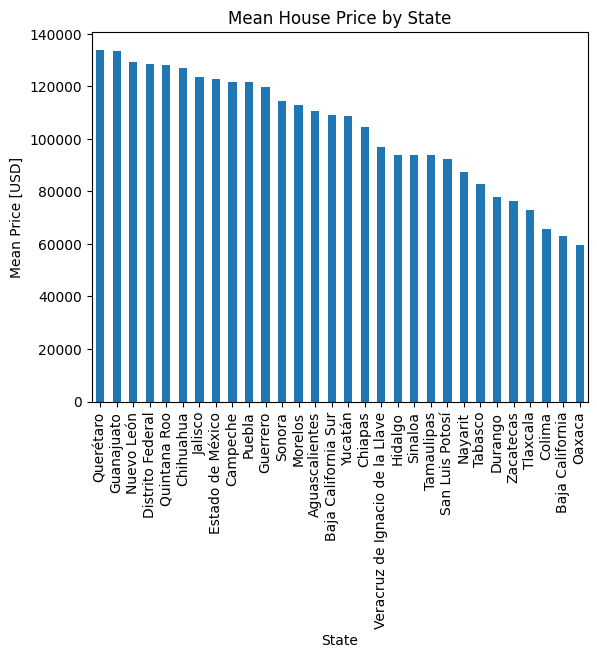

In [37]:
# visualise mean price by state

mean_price_per_state.plot(
    kind='bar',
    xlabel='State',
    ylabel='Mean Price [USD]',
    title='Mean House Price by State'
)

We can see from the graph that Querétaro has the highest average mean price for houses. But this is odd because according to the data from https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP, this state has a low GDP compared to mose states, so there may be a disconnection here. To further deep dive this disconnection, we will visualise the mean price per square feet in each state.

In [38]:
df['price_per_m2'] = df['price_usd'] / df['area_m2']

In [39]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


<Axes: title={'center': 'Mean House Price Per M^2 by State'}, xlabel='State', ylabel='Mean Price Per M^2 [USD]'>

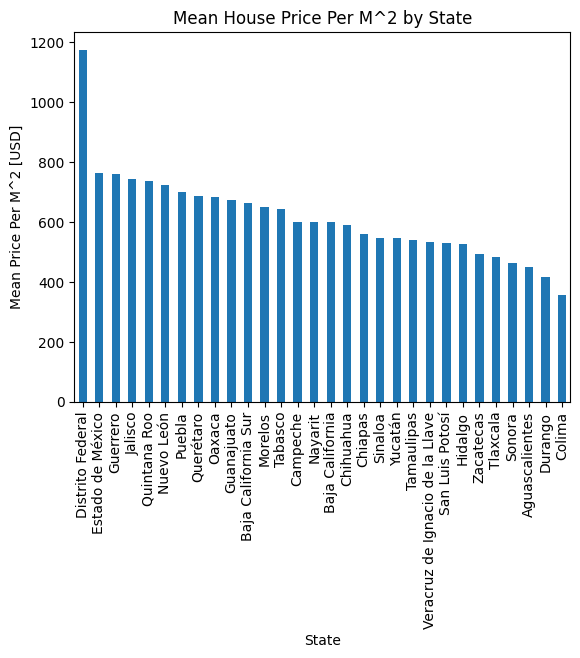

In [40]:
# visualise mean house price per m^2 by state

mean_price_per_m2 = df.groupby('state')['price_per_m2'].mean().sort_values(ascending=False)
mean_price_per_m2.plot(
    kind='bar',
    xlabel='State',
    ylabel= 'Mean Price Per M^2 [USD]',
    title='Mean House Price Per M^2 by State'
)

Looking at the bar graph, this make more sense that Distrito Federal is the most expensive state by mean price per m2. This state also has the highest GDP and Columa has the second lowest GDP and lowest mean price per m2 which seem matching. We can conclude that, the mean price per m2 is make more sense in representing the picture of estate market in Mexico.

Answer to the question 1: Distrito Federal is by far the most expensive market, following by 10 states by mean price per m2 are in the top 10 GDP state in the country, which reflects the real estate in Mexico precisely.

### 2. Is there a relationship between house size and price?

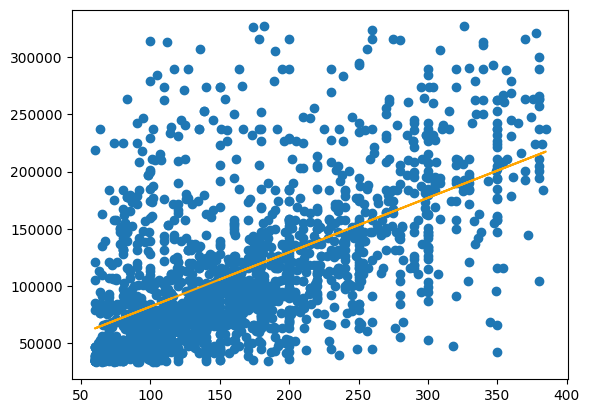

In [41]:
# Use scatter plot to answer this question

x=df['area_m2']
y=df['price_usd']

plt.scatter(x, y)
plt.xlabel = ('Area_m2')
plt.ylabel = ('Price [USD]')
plt.title=('Price vs Area_m2')
m, b = np.polyfit(x,y,1) # obtain m (slope) and b (intercept) of linear regression line
plt.plot(x,m*x+b, color='orange') # plot regression line as orange

As can be seen from the scatter plot, we can conlude that there is a trend as the bigger the house size, the higher the price. To further addressing this trend, let's use correlation to show the relationship numercially.

In [42]:
price_vs_size_correlation = df['area_m2'].corr(df['price_usd'])
price_vs_size_correlation

0.5855182454266905

Answer to the question 2: since the correlation is around 0.58, it shows a moderate correlation between price and size.